In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"C:\Users\Ram\Downloads\archive\all_stocks_5yr.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [7]:
print(df.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [8]:
df_clean = df.dropna()

In [9]:
print(df_clean.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [10]:
df_clean.duplicated().sum()

np.int64(0)

In [11]:
df_clean.describe()

,date,open,high,low,close,volume
count,619029,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,2015-08-18 00:45:31.033280,83.023334,83.778419,82.256200,83.043305,4.321892e+06
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,97.378769,98.207735,96.507634,97.388913,8.693671e+06


 ### Below: Represents the stock's risk profile, showing that small daily price changes are the norm, and extreme movements are rare.

C:\Users\Ram\AppData\Local\Temp\ipykernel_7500\1269361659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['daily_return'] = df_clean['close'].pct_change()


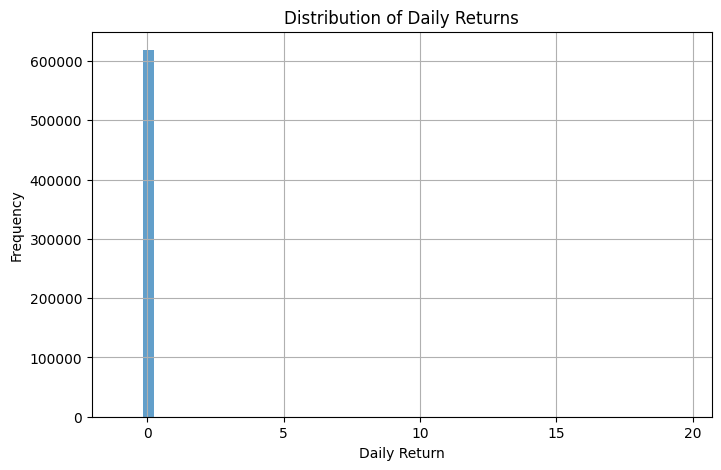

In [12]:
#ASE
# Calculate and plot daily returns distribution
df_clean['daily_return'] = df_clean['close'].pct_change()

plt.figure(figsize=(8,5))
df_clean['daily_return'].hist(bins=50, alpha=0.7)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

In [13]:
Q1 = df_clean["close"].quantile(0.25)
Q3 = df_clean["close"].quantile(0.75)
IQR = Q3 - Q1

outliers = df_clean[(df_clean["close"] < Q1 - 1.5*IQR) | (df_clean["close"] > Q3 + 1.5*IQR)]

In [14]:
num_outliers = outliers.shape[0]
total_rows = df_clean.shape[0]

percentage = (num_outliers / total_rows) * 100

print(f"number of outliers: {num_outliers}")
print(f"percentage: {percentage:.2f}%")


number of outliers: 38930
percentage: 6.29%


In [15]:
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

C:\Users\Ram\AppData\Local\Temp\ipykernel_7500\1472045736.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
C:\Users\Ram\AppData\Local\Temp\ipykernel_7500\1472045736.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
C:\Users\Ram\AppData\Local\Temp\ipykernel_7500\1472045736.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [16]:
print(df_clean.describe())

                             date           open           high  \
count                      619029  619029.000000  619029.000000   
mean   2015-08-18 00:45:31.033280      73.001563      73.654279   
min           2013-02-08 00:00:00       1.620000       1.690000   
25%           2014-05-20 00:00:00      40.220000      40.620000   
50%           2015-08-21 00:00:00      62.590000      63.150000   
75%           2016-11-15 00:00:00      94.370000      95.180000   
max           2018-02-07 00:00:00     175.595000     177.020000   
std                           NaN      43.677789      44.024722   

                 low          close        volume   daily_return  
count  619029.000000  619029.000000  6.190290e+05  619028.000000  
mean       72.340742      73.023583  3.114589e+06       0.000573  
min         1.500000       1.590000  1.010000e+02      -0.029182  
25%        39.830000      40.240800  1.070351e+06      -0.006809  
50%        62.020000      62.620000  2.082165e+06       0.000

In [17]:
Q1 = df_clean["close"].quantile(0.25)
Q3 = df_clean["close"].quantile(0.75)
IQR = Q3 - Q1

outliers = df_clean[(df_clean["close"] < Q1 - 1.5*IQR) | (df_clean["close"] > Q3 + 1.5*IQR)]

In [18]:
num_outliers = outliers.shape[0]
total_rows = df_clean.shape[0]

percentage = (num_outliers / total_rows) * 100

print(f"number of outliers: {num_outliers}")
print(f"percentage: {percentage:.2f}%")

number of outliers: 0
percentage: 0.00%


In [19]:
df_clean.head()

,date,open,high,low,close,volume,Name,daily_return
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL,-0.019661
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL,-0.013140
3,2013-02-13,14.30,14.94,14.25,14.66,9105848.5,AAL,0.027330
4,2013-02-14,14.94,14.96,13.16,13.99,9105848.5,AAL,-0.029182


In [20]:
!pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

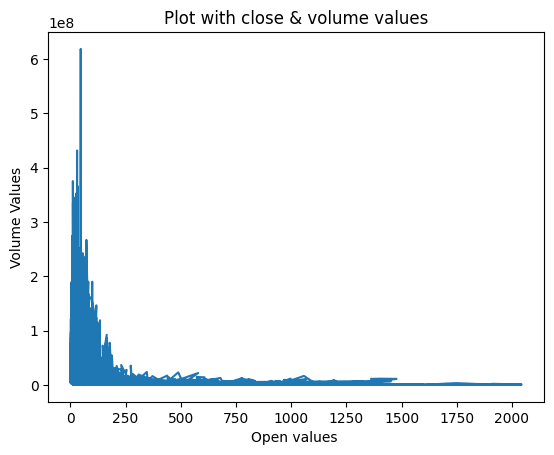

In [22]:
plt.plot(df['open'],df['volume'] )
plt.title('Plot with close & volume values')
plt.xlabel("Open values ")
plt.ylabel("Volume Values")
plt.show()

### The plot above shows an extreme concentration of high volume at low Open Price values (below 250), with volume dropping sharply for higher prices, indicating an inverse correlation.



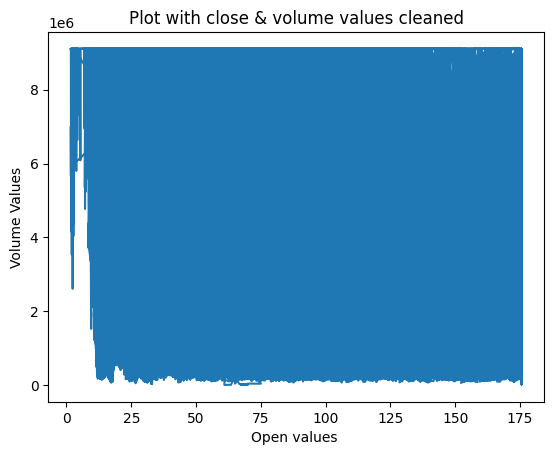

In [23]:
plt.plot(df_clean['open'],df_clean['volume'] )
plt.title('Plot with close & volume values cleaned')
plt.xlabel("Open values ")
plt.ylabel("Volume Values")
plt.show()

### After likely removing high-price outliers, the plot reveals a persistent high volume across all lower price values (0 to 175), suggesting a cleaning process was applied.



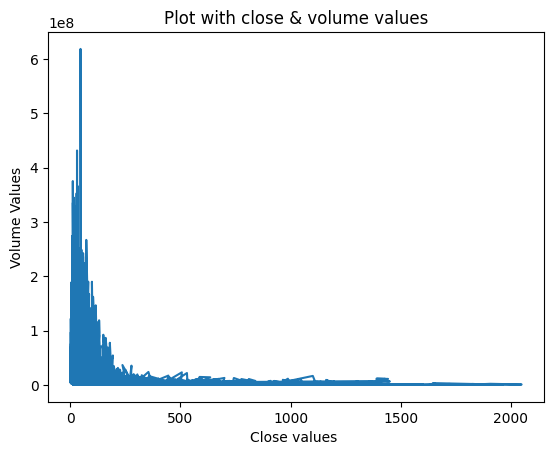

In [24]:
plt.plot(df['close'],df['volume'] )
plt.title('Plot with close & volume values')
plt.xlabel("Close values ")
plt.ylabel("Volume Values")
plt.show()

### Similar to the Open price, the majority of trading volume is heavily concentrated at low Close Price values (below 250), confirming that high volume activity occurs when the stock price is low.



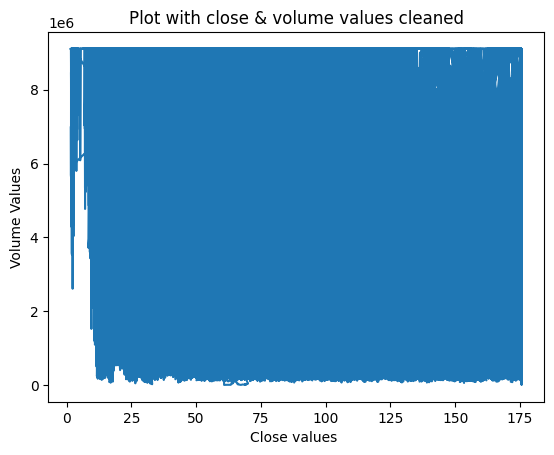

In [25]:
plt.plot(df_clean['close'],df_clean['volume'] )
plt.title('Plot with close & volume values cleaned')
plt.xlabel("Close values ")
plt.ylabel("Volume Values")
plt.show()

### After outlier removal, the plot shows uniformly high volume across all remaining low Close Price values (0 to 175), confirming high trading activity in this price range.

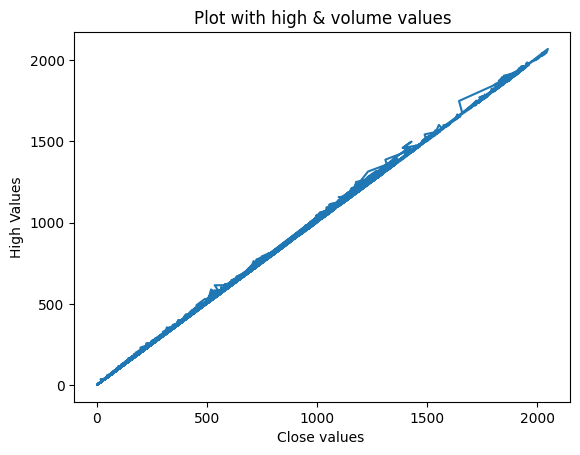

In [26]:
plt.plot(df['close'],df['high'] )
plt.title('Plot with high & volume values')
plt.xlabel("Close values ")
plt.ylabel("High Values")
plt.show()

### The plot displays a perfectly linear, strong positive relationship between Close and High prices, with the relationship breaking down and showing outliers at extremely high price values.

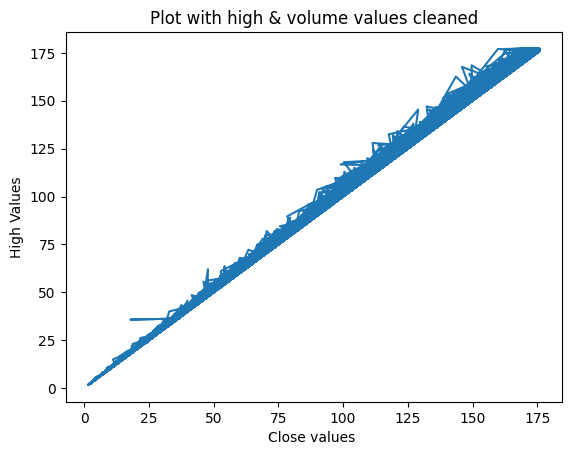

In [27]:
plt.plot(df_clean['close'],df_clean['high'] )
plt.title('Plot with high & volume values cleaned')
plt.xlabel("Close values ")
plt.ylabel("High Values")
plt.show()

### The relationship remains strongly linear after outlier removal, confirming that the Close price is almost always identical or very close to the High price on any given day.

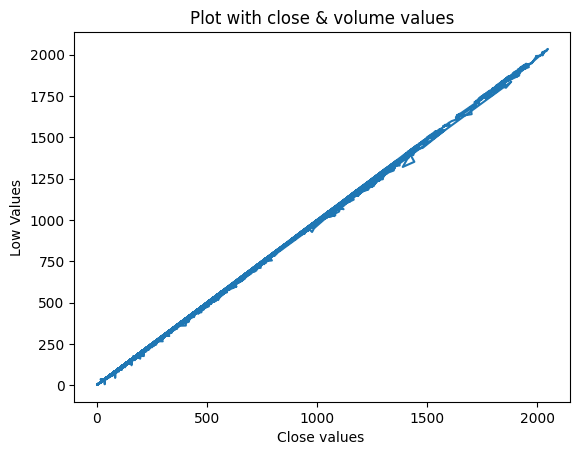

In [28]:
plt.plot(df['close'],df['low'] )
plt.title('Plot with close & volume values')
plt.xlabel("Close values ")
plt.ylabel("Low Values")
plt.show()

### The plot shows a near-perfect linear correlation between the Close and Low prices, with the relationship breaking down due to outliers at very high price values.

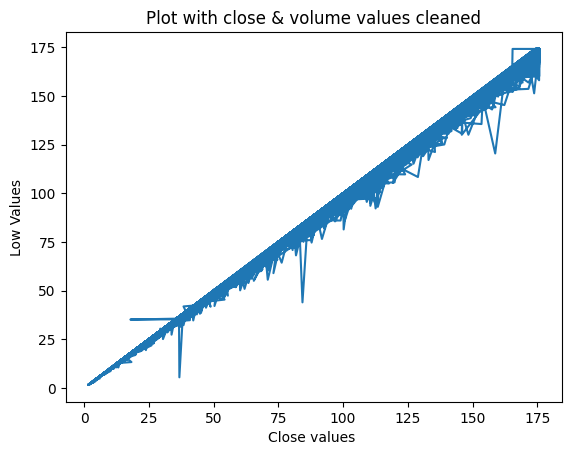

In [29]:
plt.plot(df_clean['close'],df_clean['low'] )
plt.title('Plot with close & volume values cleaned')
plt.xlabel("Close values ")
plt.ylabel("Low Values")
plt.show()

### After outlier removal, the relationship remains strongly linear, confirming the Close price is almost always identical or very close to the Low price on a given day.

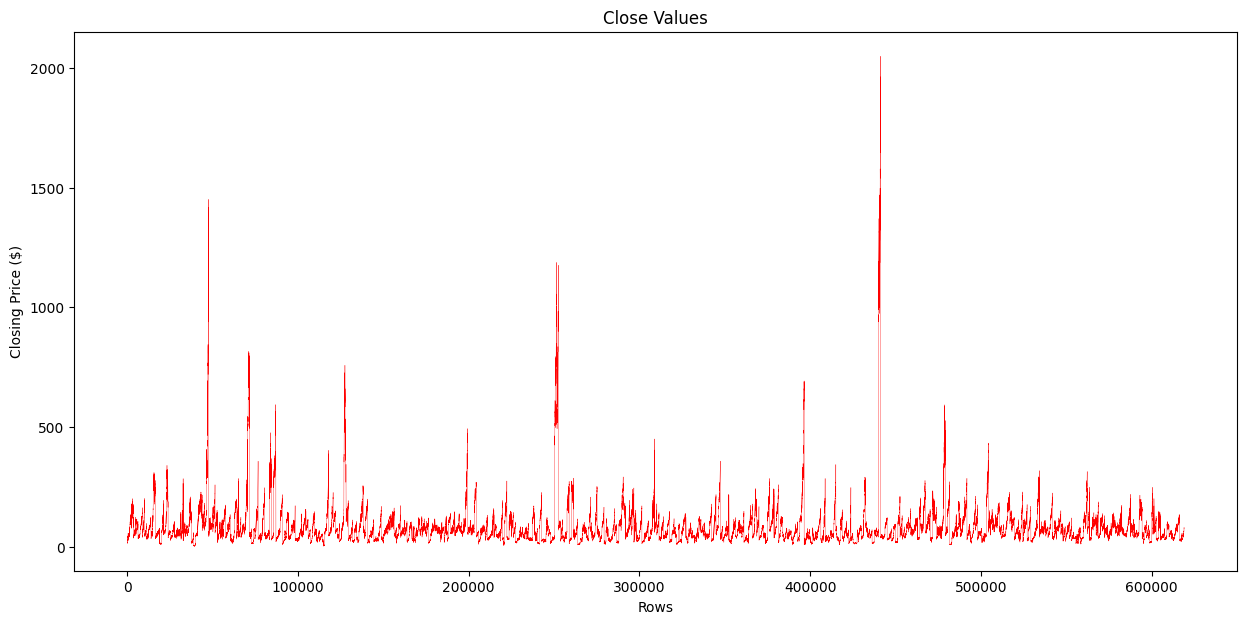

In [30]:
plt.figure(figsize=(15, 7))
plt.plot (df['close'] , color = 'red' ,linewidth=.25 )
plt.title('Close Values')
plt.xlabel('Rows')
plt.ylabel('Closing Price ($)')
plt.show()

### The time series plot reveals that the Close price is generally low and stable, punctuated by infrequent, extreme, high-magnitude spikes (outliers) across the observation period.

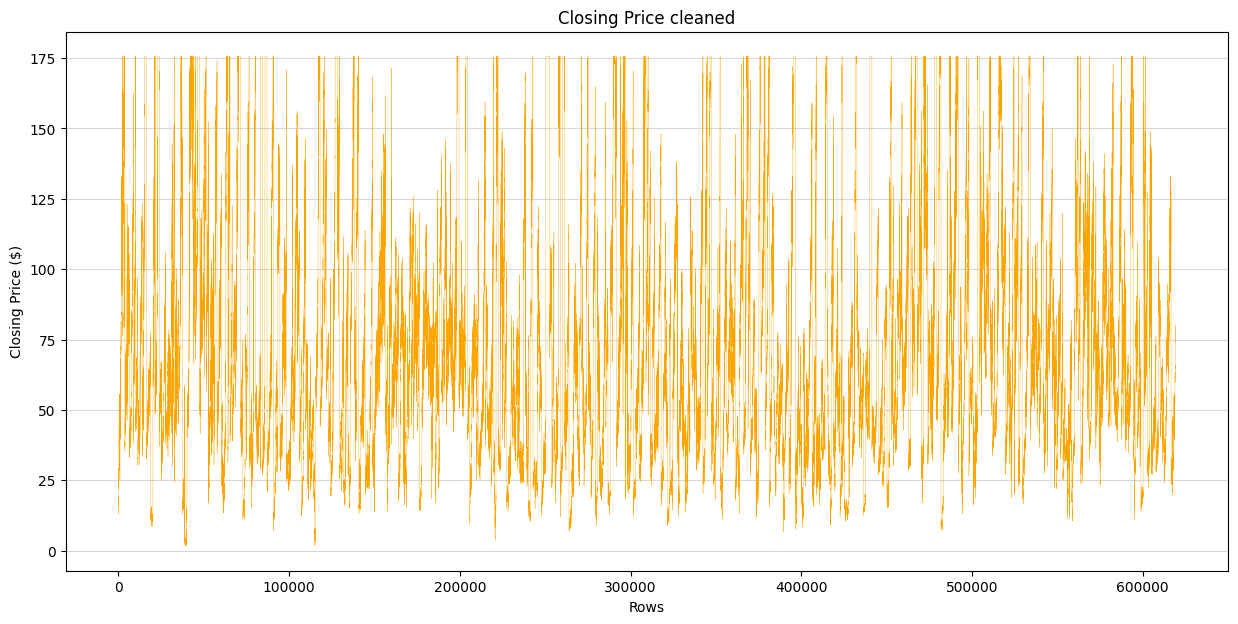

In [31]:
plt.figure(figsize=(15, 7))
plt.plot (df_clean['close'] , color = 'orange',  linewidth=.25)
plt.title('Closing Price cleaned')
plt.xlabel('Rows')
plt.ylabel('Closing Price ($)')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The cleaned Closing Price shows high day-to-day volatility with values consistently fluctuating between approximately $25 and $175, with no clear long-term trend.

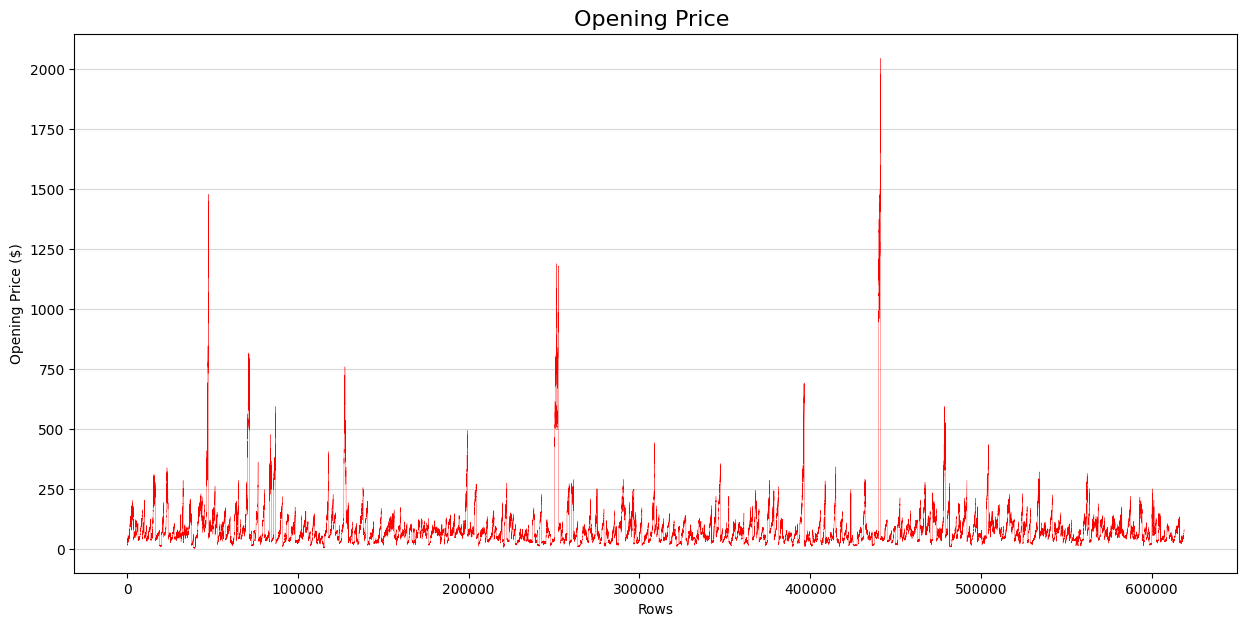

In [32]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['open'], color = 'red' , linewidth=.25)
plt.title('Opening Price ', fontsize=16)
plt.xlabel('Rows')
plt.ylabel('Opening Price ($)')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The Opening Price time series is highly volatile, characterized by frequent extreme spikes (outliers), reaching values well over $1,500, punctuated by periods of low, stable prices.

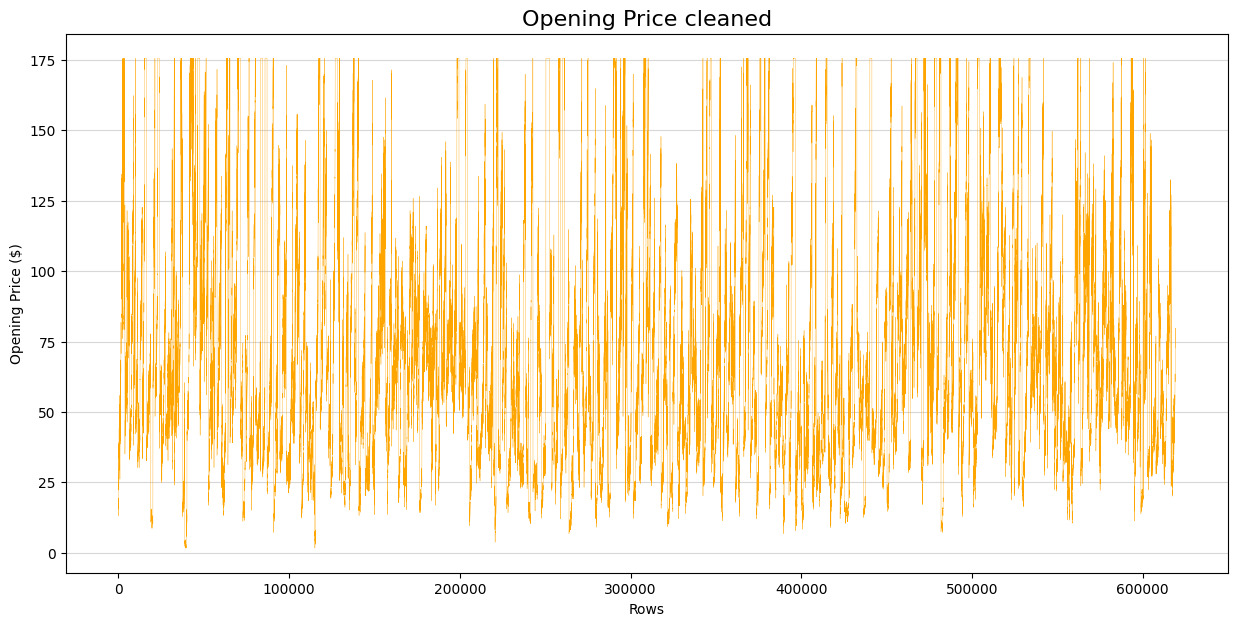

In [33]:
plt.figure(figsize=(15, 7))
plt.plot(df_clean.index, df_clean['open'],color ='orange', linewidth=.25)
plt.title('Opening Price cleaned', fontsize=16)
plt.xlabel('Rows')
plt.ylabel('Opening Price ($)')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The cleaned Opening Price shows high day-to-day volatility with prices consistently fluctuating between approximately $25 and $175, with no discernible long-term trend.

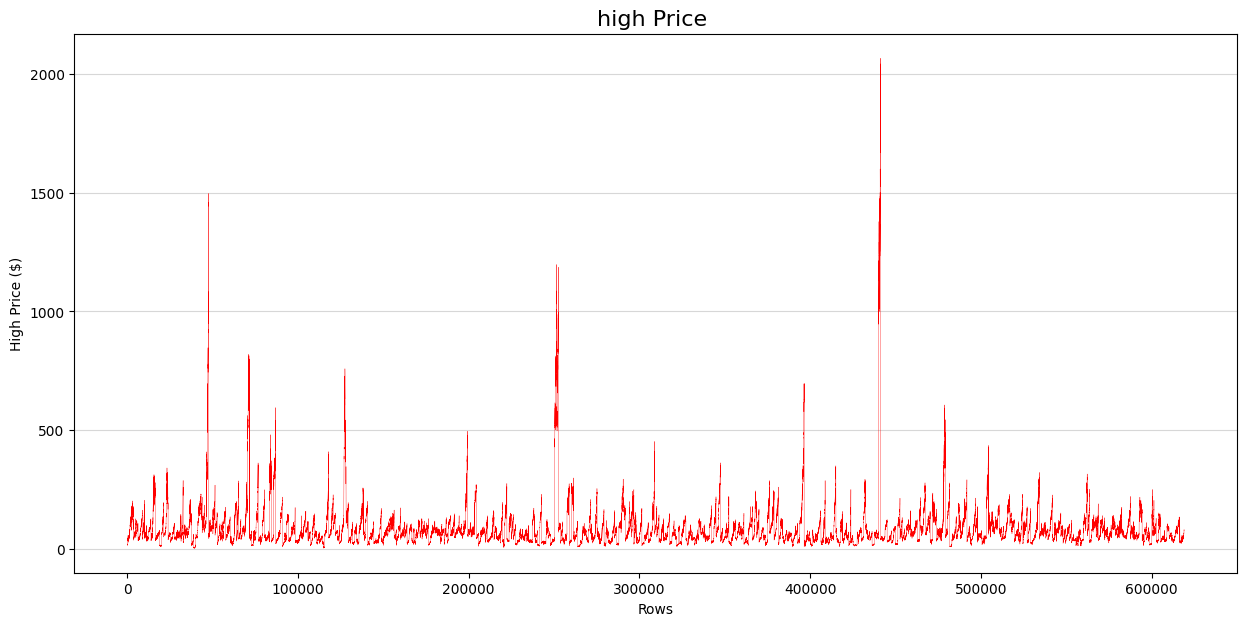

In [34]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['high'], color = 'red' , linewidth=.25)
plt.title('high Price ', fontsize=16)
plt.xlabel('Rows')
plt.ylabel('High Price ($)')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The High Price time series is highly volatile, characterized by frequent extreme spikes (outliers), reaching values well over $2,000, interspersed with prolonged periods of low, stable prices.

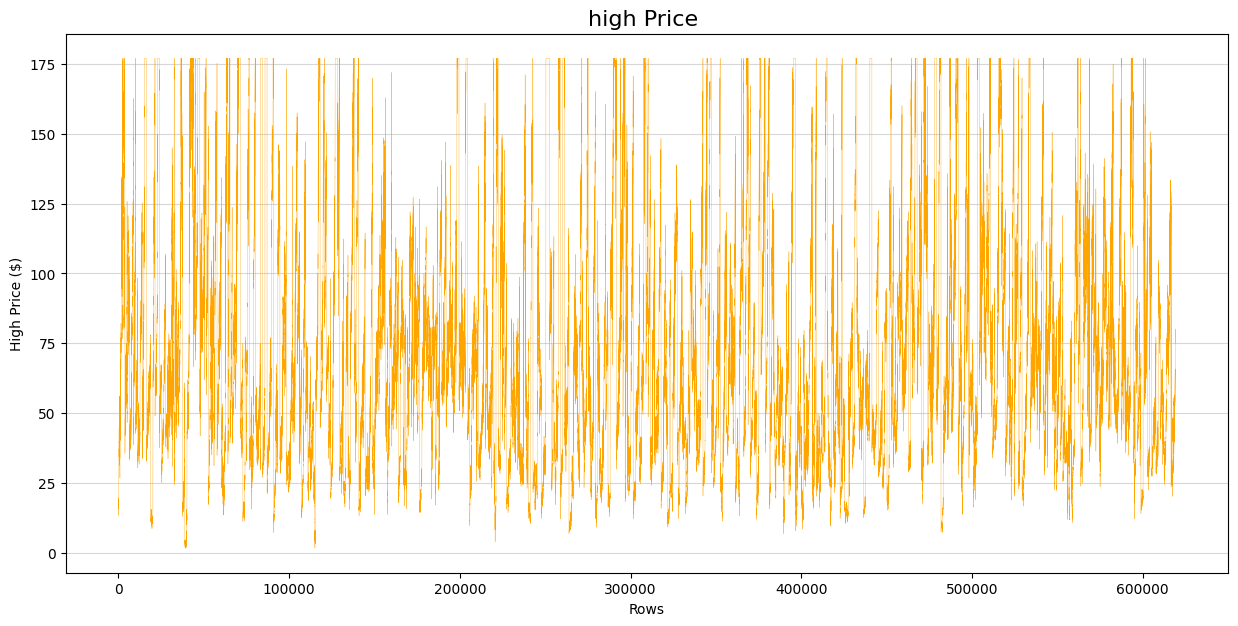

In [35]:
plt.figure(figsize=(15, 7))
plt.plot(df_clean.index, df_clean['high'],color ='orange', linewidth=.25)
plt.title('high Price ', fontsize=16)
plt.xlabel('Rows')
plt.ylabel('High Price ($)')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The cleaned High Price shows high day-to-day volatility with values consistently fluctuating between approximately $25 and $175, with no clear long-term trend.

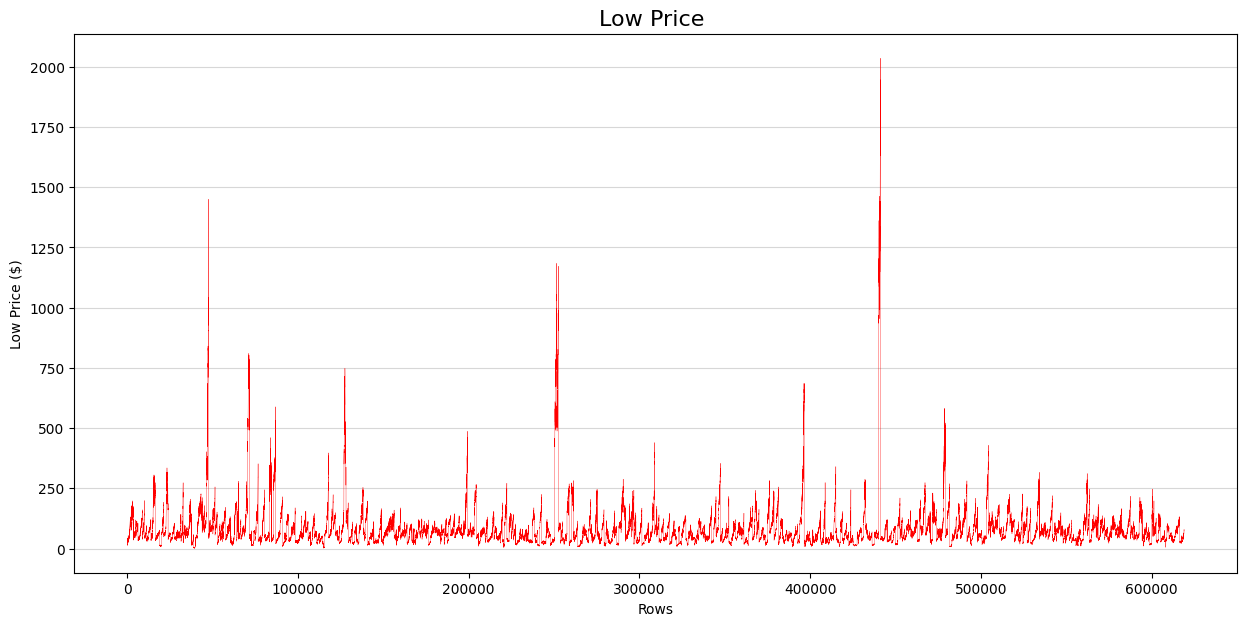

In [36]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['low'], color = 'red' , linewidth=.25)
plt.title('Low Price ', fontsize=16)
plt.xlabel('Rows')
plt.ylabel('Low Price ($)')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The Low Price time series is highly volatile, characterized by frequent extreme spikes (outliers), reaching values well over $1,500, interspersed with prolonged periods of low, stable prices.

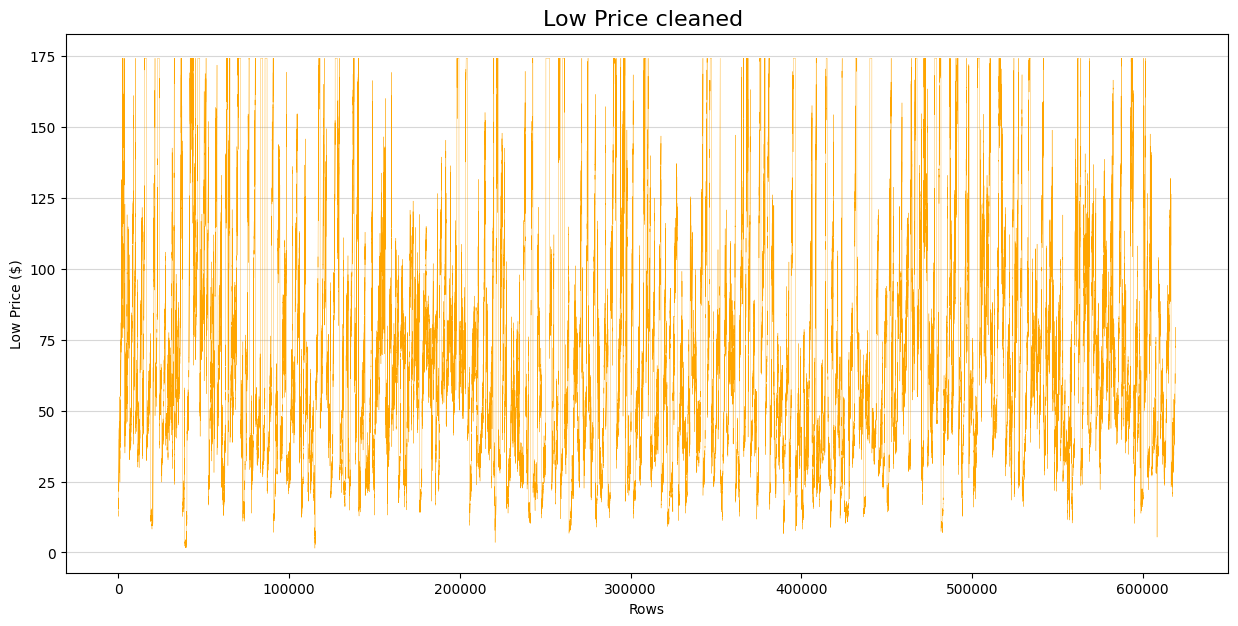

In [37]:
plt.figure(figsize=(15, 7))
plt.plot(df_clean.index, df_clean['low'], color = 'orange' , linewidth=.25)
plt.title('Low Price cleaned ', fontsize=16)
plt.xlabel('Rows')
plt.ylabel('Low Price ($)')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The cleaned Low Price shows high day-to-day volatility with values consistently fluctuating between approximately $0 and $175, with no discernible long-term trend.

In [38]:
df_clean['Name'].value_counts()

Name
ZTS     1259
AAL     1259
AAPL    1259
AAP     1259
ABBV    1259
        ... 
DXC      215
BHGE     152
BHF      142
DWDP     109
APTV      44
Name: count, Length: 505, dtype: int64

In [39]:
df_clean['Name'].mode()

0         A
1       AAL
2       AAP
3      AAPL
4      ABBV
       ... 
463     XYL
464     YUM
465     ZBH
466    ZION
467     ZTS
Name: Name, Length: 468, dtype: object

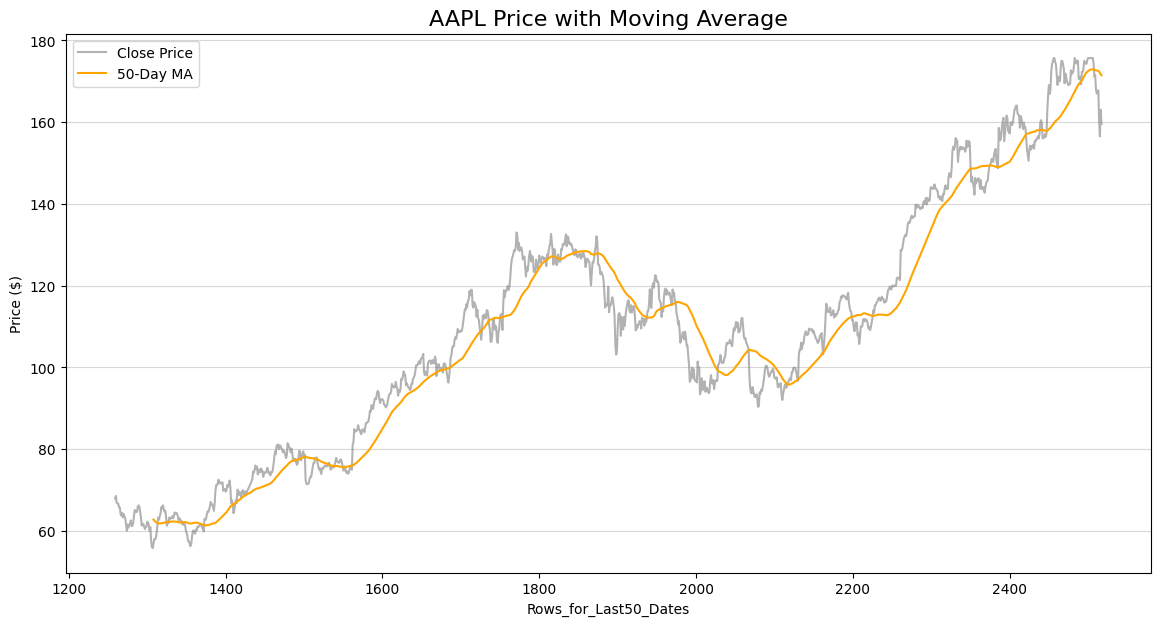

In [40]:
df_stock = df_clean[df_clean['Name'] == 'AAPL'].copy()
# Calculate 50-day and 200-day Moving Averages
df_stock['MA_Last 50 day'] = df_stock['close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
# Plot Close Price
plt.plot(df_stock.index, df_stock['close'], label='Close Price', color='gray', alpha=0.6)
# Plot MAs
plt.plot(df_stock.index, df_stock['MA_Last 50 day'], label='50-Day MA', color='orange')

plt.title('AAPL Price with Moving Average', fontsize=16)
plt.xlabel('Rows_for_Last50_Dates')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The 50-day Moving Average (MA) successfully tracks the short-term trend of the AAPL stock, acting as a dynamic support during periods of strong upward movement.

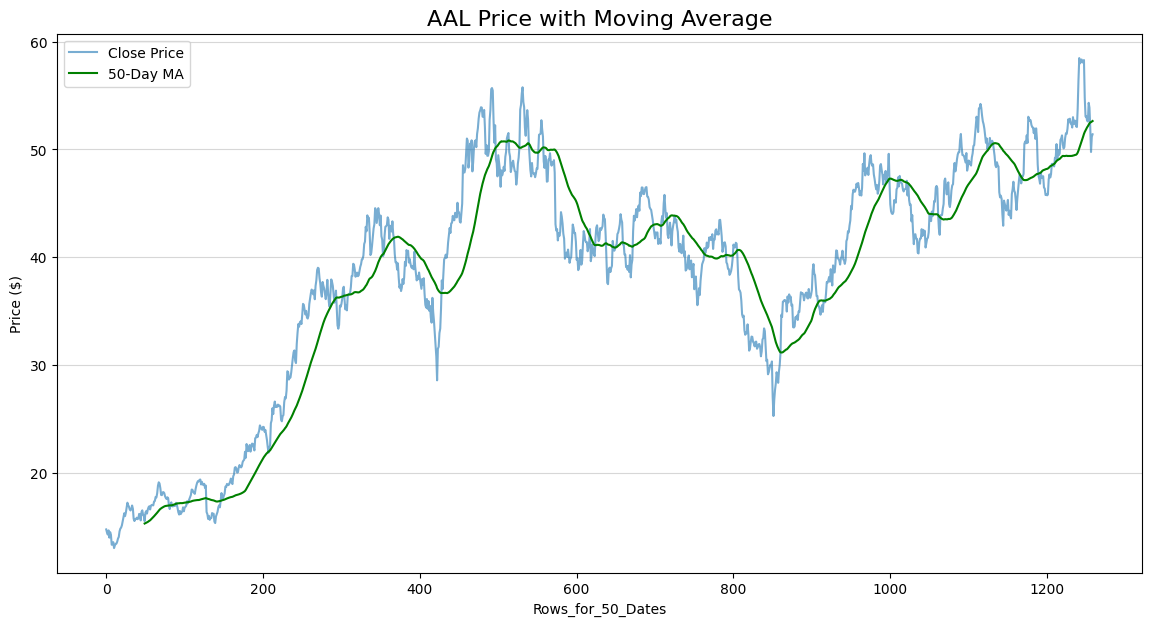

In [41]:
df_stock = df_clean[df_clean['Name'] == 'AAL'].copy()
# Calculate 50-day and 200-day Moving Averages
df_stock['MA_Last 50 day'] = df_stock['close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
# Plot Close Price
plt.plot(df_stock.index, df_stock['close'], label='Close Price', alpha=0.6)
# Plot MAs
plt.plot(df_stock.index, df_stock['MA_Last 50 day'], label='50-Day MA', color='green')

plt.title('AAL Price with Moving Average', fontsize=16)
plt.xlabel('Rows_for_50_Dates')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The 50-day Moving Average (MA) accurately captures the stock's major trends, particularly demonstrating the MA's sharp drop effectively tracking the severe late-period price crash.

### The AAL stock exhibits higher short-term volatility than AAPL, with its price crossing the 50-day MA frequently, making the MA a less reliable short-term signal.

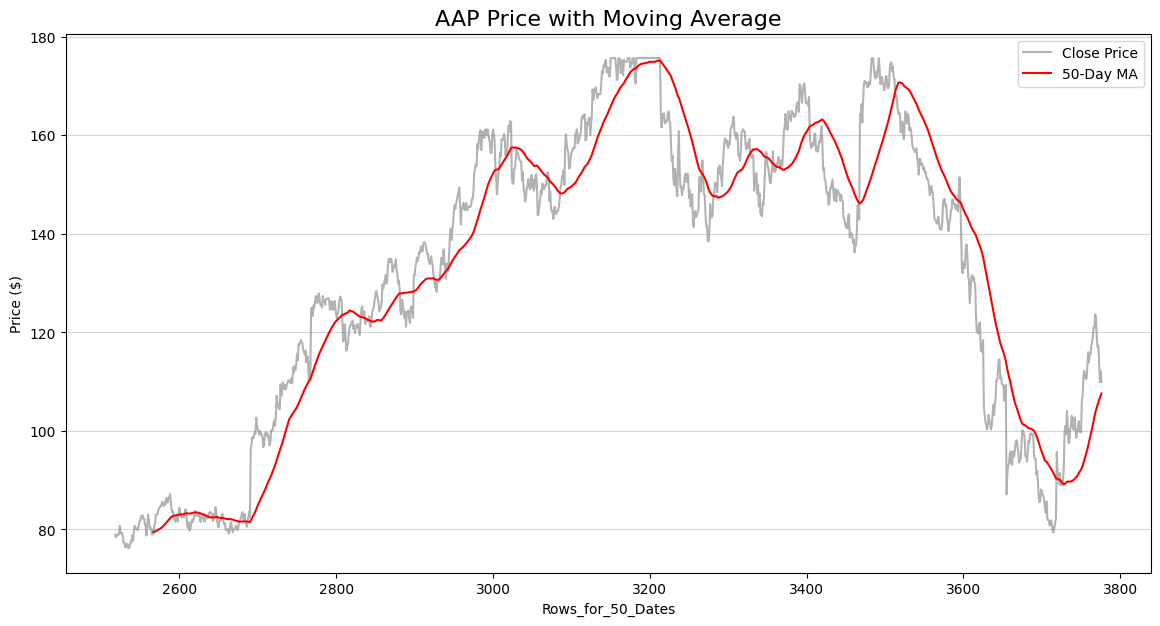

In [42]:
df_stock = df_clean[df_clean['Name'] == 'AAP'].copy()
# Calculate 50-day and 200-day Moving Averages
df_stock['MA_Last 50 day'] = df_stock['close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_stock.index, df_stock['close'], label='Close Price',  color= 'gray', alpha=0.6)
plt.plot(df_stock.index, df_stock['MA_Last 50 day'], label='50-Day MA', color='red')

plt.title('AAP Price with Moving Average', fontsize=16)
plt.xlabel('Rows_for_50_Dates')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The stock price is contained within a narrow, low-volatility band (STD) for the entire period, with a minor, temporary increase in volatility occurring around the 3500 mark before the price crash.

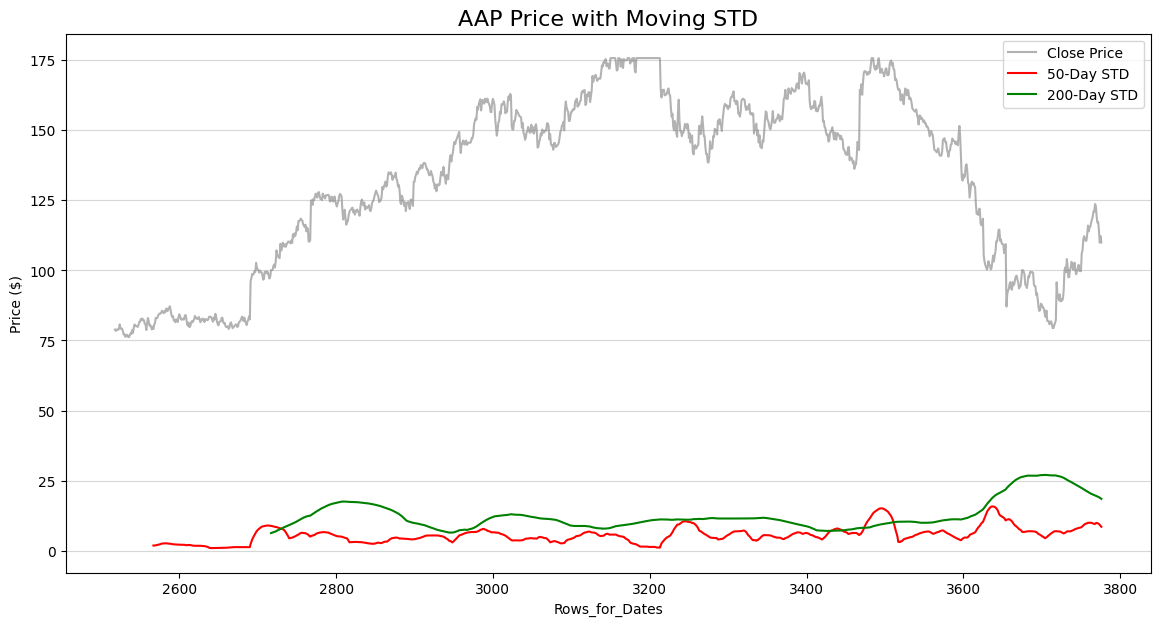

In [43]:
df_stock = df_clean[df_clean['Name'] == 'AAP'].copy()
# Calculate 50-day and 200-day Moving Averages
df_stock['STD_Last 50 day'] = df_stock['close'].rolling(window=50).std()
df_stock['STD_Last 200 day'] = df_stock['close'].rolling(window=200).std()

plt.figure(figsize=(14, 7))
plt.plot(df_stock.index, df_stock['close'], label='Close Price',  color= 'gray', alpha=0.6)

plt.plot(df_stock.index, df_stock['STD_Last 50 day'], label='50-Day STD', color='red')
plt.plot(df_stock.index, df_stock['STD_Last 200 day'], label='200-Day STD', color='green')

plt.title('AAP Price with Moving STD', fontsize=16)
plt.xlabel('Rows_for_Dates')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The stock's volatility (STD) remained consistently low throughout the period, with a minor, temporary increase in risk (around the 3600 mark) preceding the major price crash.

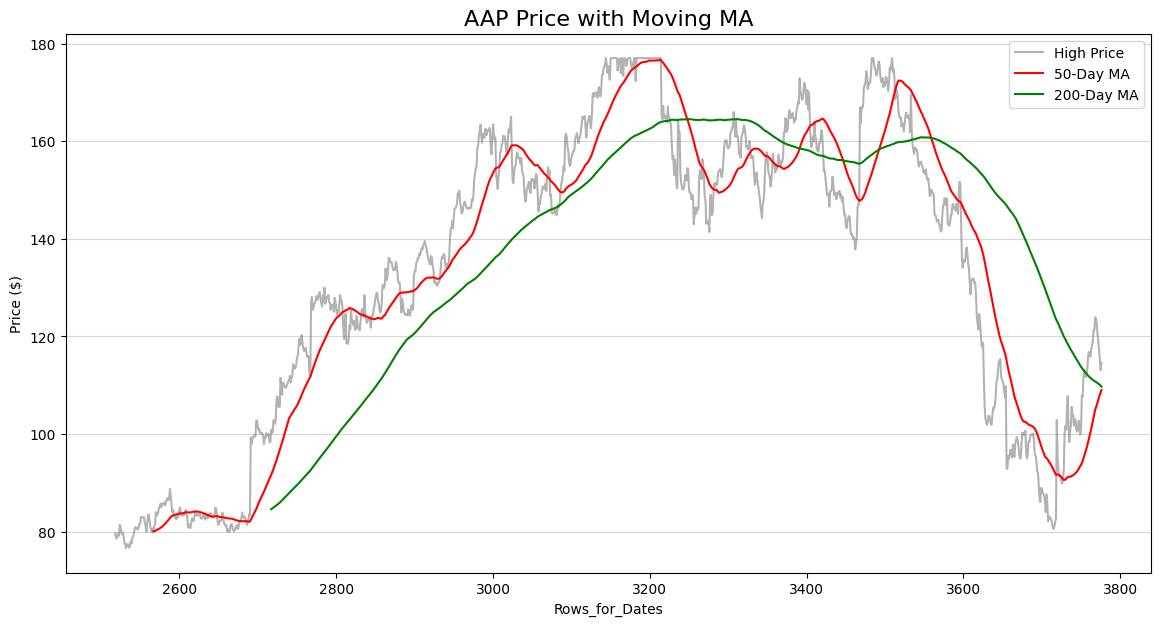

In [44]:
df_stock = df_clean[df_clean['Name'] == 'AAP'].copy()
# Calculate 50-day and 200-day Moving Averages
df_stock['MA_Last 50 day'] = df_stock['high'].rolling(window=50).mean()
df_stock['MA_Last 200 day'] = df_stock['high'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_stock.index, df_stock['high'], label='High Price',  color= 'gray', alpha=0.6)

plt.plot(df_stock.index, df_stock['MA_Last 50 day'], label='50-Day MA', color='red')
plt.plot(df_stock.index, df_stock['MA_Last 200 day'], label='200-Day MA', color='green')

plt.title('AAP Price with Moving MA', fontsize=16)
plt.xlabel('Rows_for_Dates')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The Death Cross (50-Day MA crossing below 200-Day MA) is clearly visible around the 3550 mark, effectively signaling the start of the subsequent major downtrend in the stock's price.

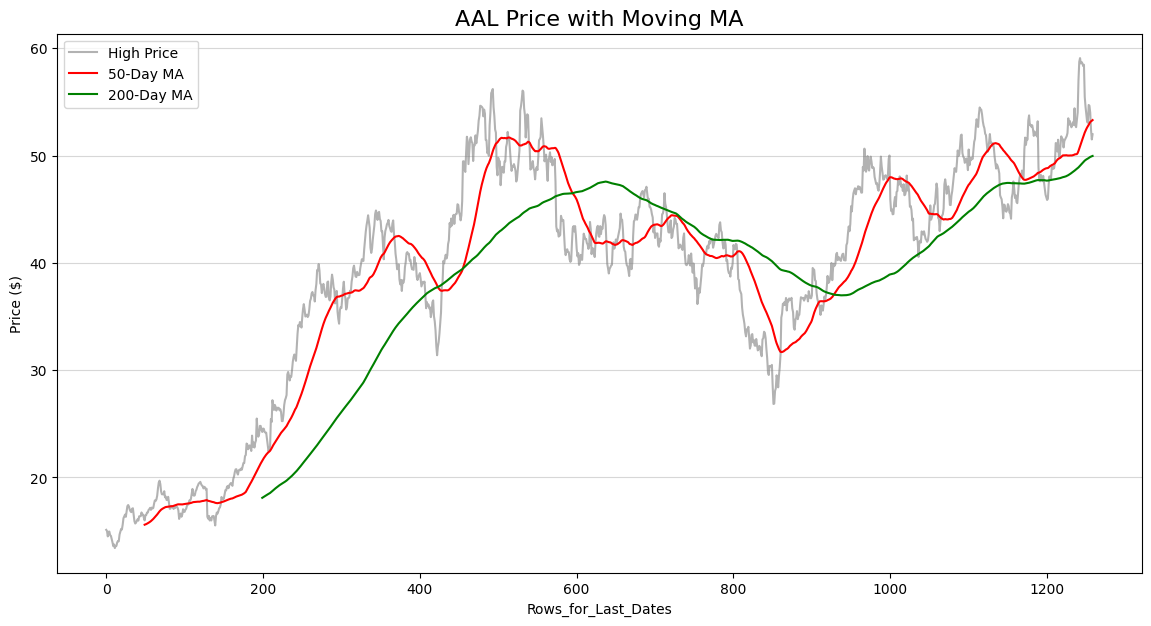

In [45]:
df_stock = df_clean[df_clean['Name'] == 'AAL'].copy()
# Calculate 50-day and 200-day Moving Averages
df_stock['MA_Last 50 day'] = df_stock['high'].rolling(window=50).mean()
df_stock['MA_Last 200 day'] = df_stock['high'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_stock.index, df_stock['high'], label='High Price',  color= 'gray', alpha=0.6)

plt.plot(df_stock.index, df_stock['MA_Last 50 day'], label='50-Day MA', color='red')
plt.plot(df_stock.index, df_stock['MA_Last 200 day'], label='200-Day MA', color='green')

plt.title('AAL Price with Moving MA', fontsize=16)
plt.xlabel('Rows_for_Last_Dates')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### The AAL stock exhibits frequent crossovers between its 50-day and 200-day Moving Averages, indicating significant market volatility and cyclicality over the period shown.

C:\Users\Ram\AppData\Local\Temp\ipykernel_7500\2537596058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rolling_volatility'] = df_clean['daily_return'].rolling(window=30).std()


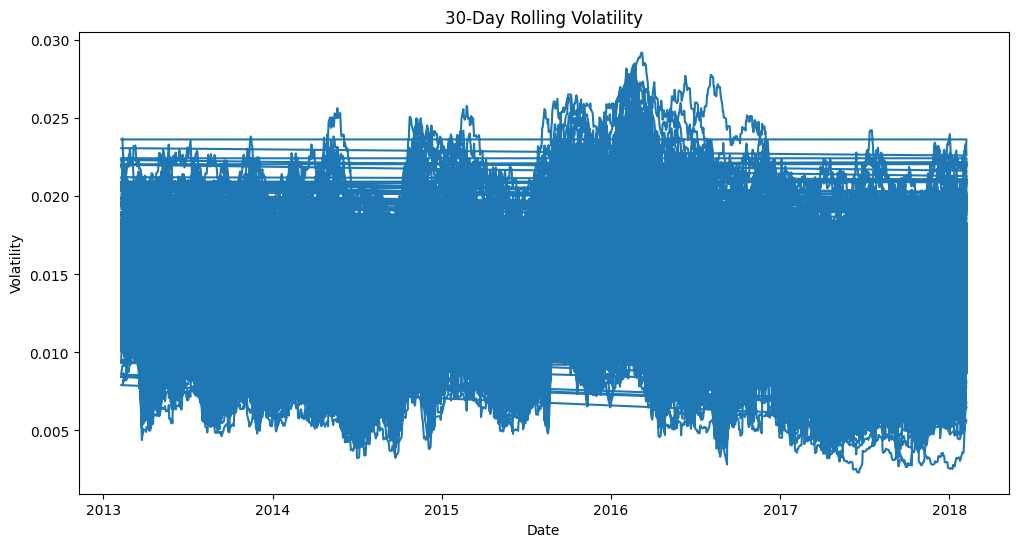

In [46]:
# 30-day rolling volatility
df_clean['rolling_volatility'] = df_clean['daily_return'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(df_clean['date'], df_clean['rolling_volatility'])
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

## 30-Day Rolling Volatility Insight
### The stock's 30-day volatility (risk) declined dramatically over the period, moving from extreme high levels in 2013 to a very low, stable range by 2018. This suggests the asset became significantly less risky over the five years, though the initial visualization has plotting issues that should be cleaned.

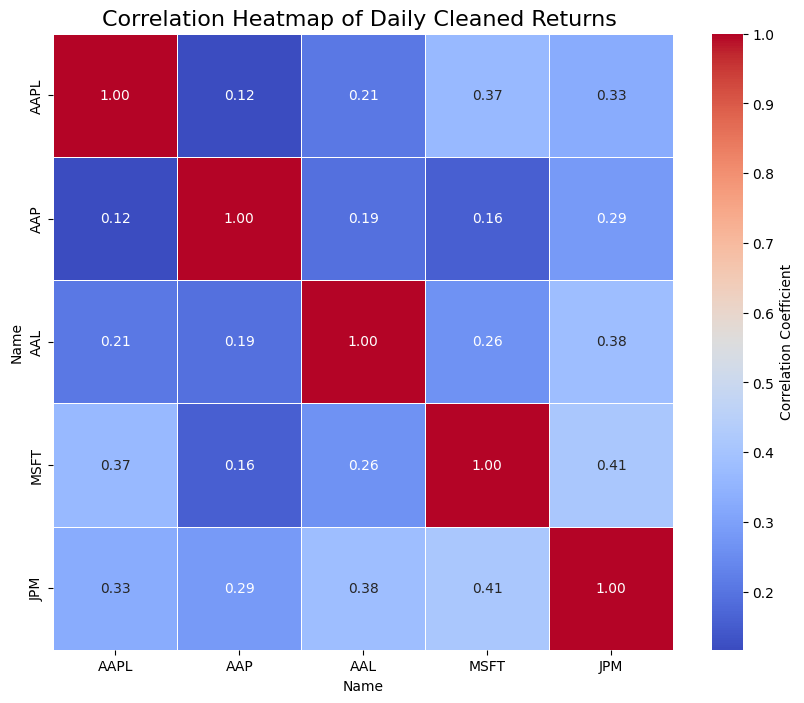

In [47]:
# 1. Select a few tickers for comparison
top_tickers = ['AAPL','AAP', 'AAL', 'MSFT', 'JPM']

# 2. Pivot data to get Closing prices for selected stocks
df_pivot = df_clean.pivot_table(index='date', columns='Name', values='close')

# 3. Calculate Daily Returns (Percentage Change) for the sample
df_returns_multi = df_pivot[top_tickers].pct_change().dropna()
df_corr = df_returns_multi.corr()

plt.figure(figsize=(10, 8))
# Use Seaborn's heatmap for visualization
sns.heatmap(
    df_corr, 
    annot=True, # Show the correlation values
    cmap='coolwarm', # Color map: red=positive, blue=negative
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Daily Cleaned Returns ', fontsize=16)
plt.show()

### All stock pairs exhibit positive correlation in their daily returns, with JPM and MSFT showing the strongest relationship (0.41), while AAPL and AAL show the weakest (0.19).

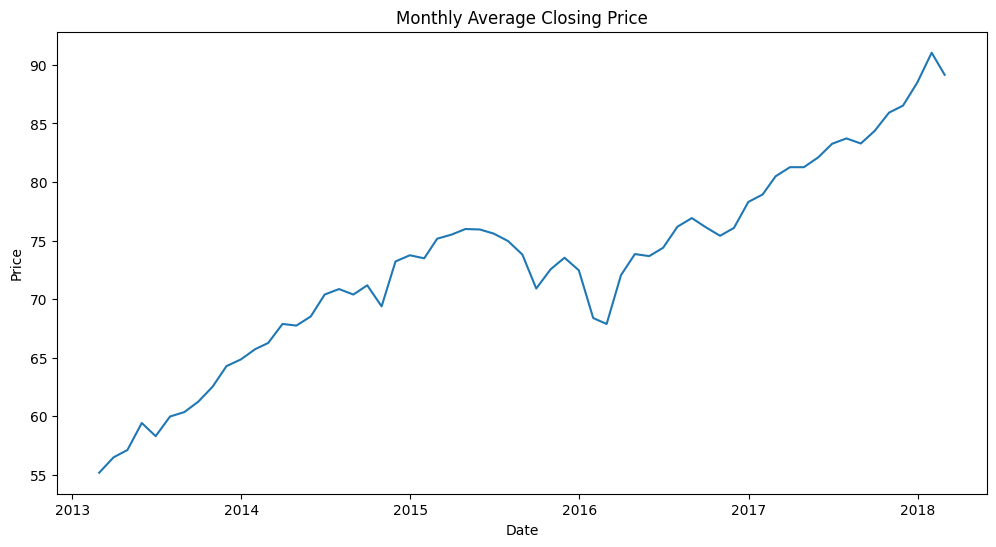

In [48]:
# Monthly resampling to observe seasonality
monthly = df_clean.set_index('date')['close'].resample('ME').mean()

plt.figure(figsize=(12,6))
plt.plot(monthly)
plt.title("Monthly Average Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


## Monthly Trend and Cyclicality Analysis

### The monthly resampling successfully **smooths the daily price fluctuations**, revealing a **strong, overall positive long-term trend** for the stock from 2013 to 2018, rising from approximately \$55 to over \$90.

### Crucially, the plot highlights significant **cyclical volatility** (or market corrections), particularly a sharp dip observed between late 2015 and early 2016. This cyclical pattern confirms the **non-linear nature** of the stock's growth, indicating that the price does not just increase steadily but is subject to notable drawdowns.

## Phase 2: Feature Engineering



## A-(Technical indicators + rolling features)

In [49]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [50]:

df["Log_Return"] = np.log(df["close"] / df["close"].shift(1))
df['Log_Return']
# new column calculates the change over time 

0              NaN
1        -0.019857
2        -0.013227
3         0.026963
4        -0.046780
            ...   
619035    0.014106
619036   -0.013454
619037   -0.039179
619038   -0.007614
619039    0.008020
Name: Log_Return, Length: 619040, dtype: float64

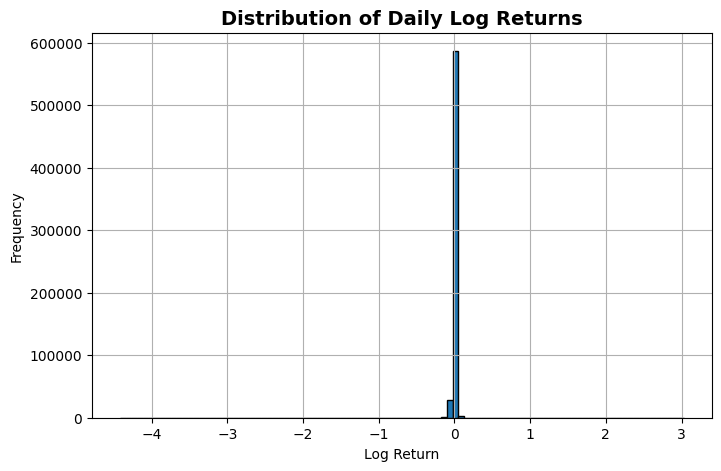

In [51]:
df = df.dropna(subset=["Log_Return"])


plt.figure(figsize=(8,5))
df["Log_Return"].hist(bins=100, edgecolor="black")
plt.title("Distribution of Daily Log Returns", fontsize=14, fontweight="bold")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()



##SMA : the change in the last N prices

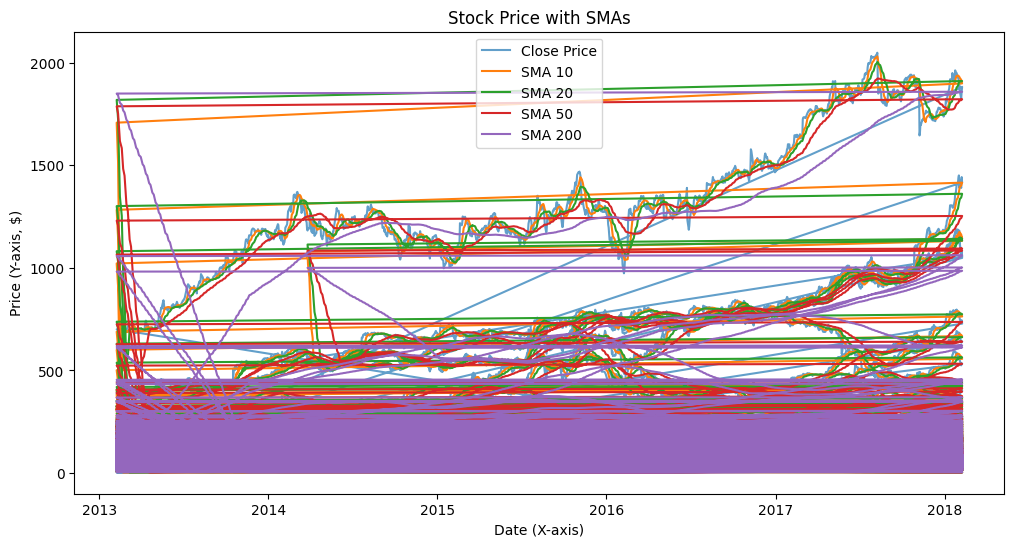

In [52]:

df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

sma_windows = [10, 20, 50, 200]
for window in sma_windows:
    df[f"SMA_{window}"] = df["close"].rolling(window=window).mean()


plt.figure(figsize=(12,6))

# X-axis = Date (index), Y-axis = values (Close and SMA)
plt.plot(df.index, df["close"], label="Close Price", alpha=0.7)

for window in sma_windows:
    plt.plot(df.index, df[f"SMA_{window}"], label=f"SMA {window}")

plt.title("Stock Price with SMAs")
plt.xlabel("Date (X-axis)")        
plt.ylabel("Price (Y-axis, $)")   
plt.legend()
plt.show()


##  EMA:Similar to SMA but gives more weight to recent prices.  
# ML feautre

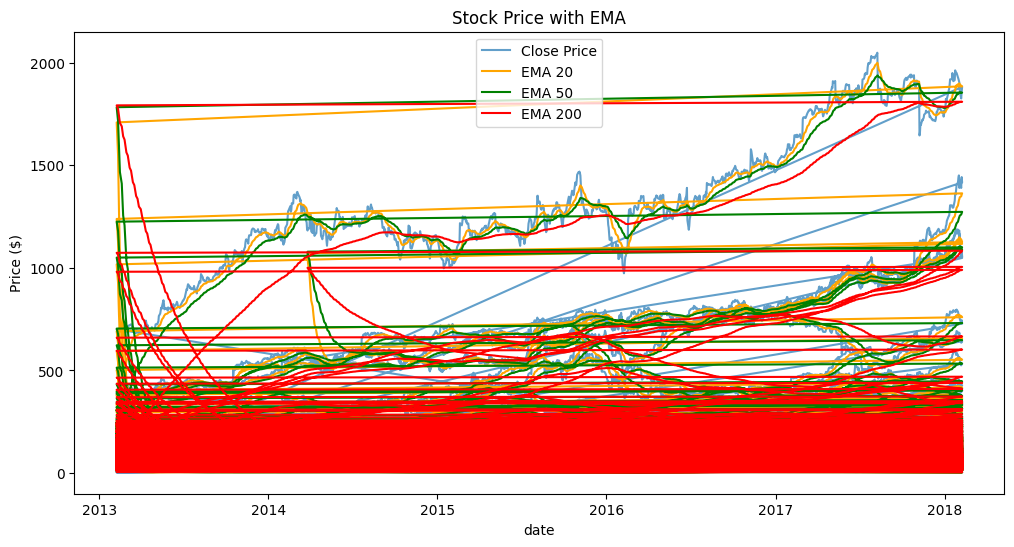

In [53]:
# Example EMA with span=20
df["EMA_20"] = df["close"].ewm(span=20, adjust=False).mean()
df["EMA_50"] = df["close"].ewm(span=50, adjust=False).mean()
df["EMA_200"] = df["close"].ewm(span=200, adjust=False).mean()




plt.figure(figsize=(12,6))
plt.plot(df.index, df["close"], label="Close Price", alpha=0.7)
plt.plot(df.index, df["EMA_20"], label="EMA 20", color="orange")
plt.plot(df.index, df["EMA_50"], label="EMA 50", color="green")
plt.plot(df.index, df["EMA_200"], label="EMA 200", color="red")
plt.title("Stock Price with EMA")
plt.xlabel("date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

## Relative Strength Index (RSI)
#ML feauture



#What is RSI: 
#RSI measures the speed & magnitude of recent price changes to detect overbought or oversold conditions.

#It oscillates between 0 and 100.

#Traders usually use 14 periods (days, hours, minutes depending on timeframe).

#Rules of thumb:

#RSI > 70 → stock is overbought (may drop soon).

#RSI < 30 → stock is oversold (may rise soon).


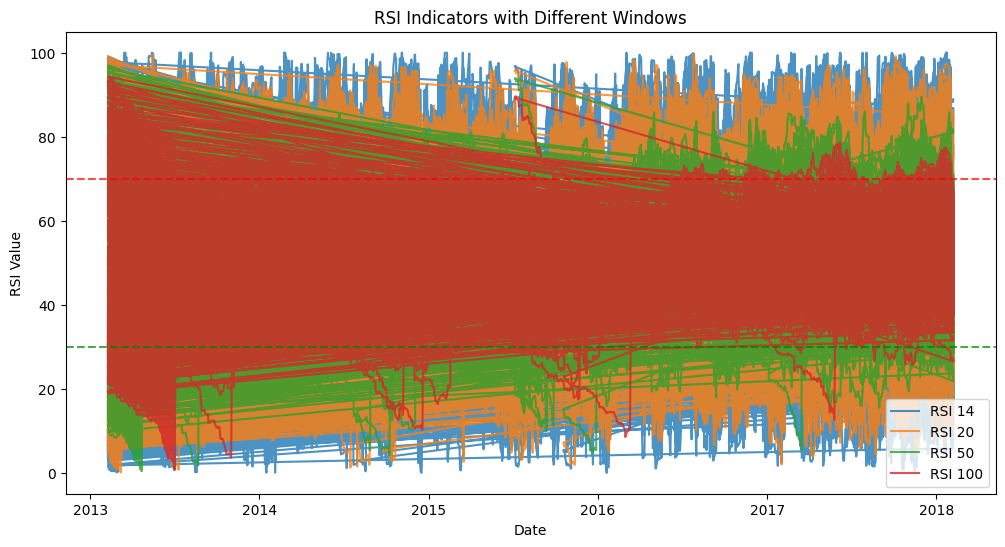

In [54]:
def compute_RSI(data, window=14):
    delta = data["close"].diff()

    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss

    # RSI formula
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Add multiple RSI columns
df["RSI_14"] = compute_RSI(df, window=14)   # Standard
df["RSI_20"] = compute_RSI(df, window=20)   # Slightly smoother
df["RSI_50"] = compute_RSI(df, window=50)   # Medium-term
df["RSI_100"] = compute_RSI(df, window=100) # Long-term

plt.figure(figsize=(12,6))

plt.plot(df.index, df["RSI_14"], label="RSI 14", alpha=0.8)
plt.plot(df.index, df["RSI_20"], label="RSI 20", alpha=0.8)
plt.plot(df.index, df["RSI_50"], label="RSI 50", alpha=0.8)
plt.plot(df.index, df["RSI_100"], label="RSI 100", alpha=0.8)

# Overbought & Oversold levels
plt.axhline(70, color="red", linestyle="--", alpha=0.7)
plt.axhline(30, color="green", linestyle="--", alpha=0.7)

plt.title("RSI Indicators with Different Windows")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.show()


## MACD: Momentum of changing in EMA  
# ML Feauture

#If MACD > Signal → bullish crossover (momentum turning upward, good buy signal).

#If MACD < Signal → bearish crossover (momentum turning downward, possible sell signal).



In [56]:
def compute_MACD(data, short=12, long=26, signal=9):
    """
    Compute MACD indicator.
    short  = period for short-term EMA (default 12)
    long   = period for long-term EMA (default 26)
    signal = period for signal line EMA (default 9)
    """
    # Short-term EMA (12)
    ema_short = data["close"].ewm(span=short, adjust=False).mean()
    # Long-term EMA (26)
    ema_long = data["close"].ewm(span=long, adjust=False).mean()

    # MACD line
    macd = ema_short - ema_long

    # Signal line (9-day EMA of MACD)
    signal_line = macd.ewm(span=signal, adjust=False).mean()

 

    return macd, signal_line, 


# Apply function and store in DataFrame
df["MACD"], df["Signal"] = compute_MACD(df)

